# Calculate kmer distribution for all sequences in UniProt
Can be used downstream as a potential marker for randomness

In [25]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from tqdm.auto import tqdm
from pqdm.threads import pqdm

In [21]:
def count_kmers_for_sequence(counter: Counter, seq: str, k: int):
    n_kmers = len(seq) - k + 1
    for i in range(n_kmers):
        kmer = seq[i:i + k]
        counter[kmer] += 1

def load_kmer_counts_for_file(fasta_file: str, result_file: str, k=6):
    kmer_counts = Counter()
    with open(fasta_file) as f:
        _seq_parts = list()
        for line in f:
            if line.startswith('>'):
                if len(_seq_parts) > 0:
                    count_kmers_for_sequence(kmer_counts, ''.join(_seq_parts), k)
                _seq_parts.clear()
                continue
            _seq_parts.append(line.rstrip())
        count_kmers_for_sequence(kmer_counts, ''.join(_seq_parts), k)

    df = pd.DataFrame(data=kmer_counts.most_common(n=1000), columns=['kmer', 'count'])
    df.to_csv(result_file, index=False)

In [26]:
tic = time.perf_counter()
load_kmer_counts_for_file('../data/sprot/uniprot_sprot.fasta', result_file='../data/sprot/kmer_counts.csv')
toc = time.perf_counter()
print(f"Processed the sequences in {toc - tic:0.4f} seconds")

1min 33s ± 2.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Processed the sequences in 87.8458 seconds


In [35]:
df_sum_counts = df_counts.groupby('kmer')['count'].sum().reset_index().sort_values('count', ascending=False)

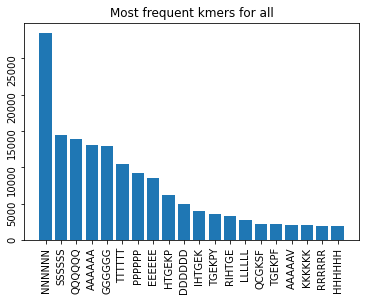

In [38]:
nkmers = 20
fig, ax = plt.subplots()
ax.bar(df_sum_counts['kmer'][:nkmers], df_sum_counts['count'][:nkmers])
ax.set_title(f'Most frequent kmers for all')
ax.tick_params(labelrotation=90)
plt.show()